# Correct PINNs Prediction with FEM and $\phi$-FEM

Maillage standard créé avec la levelset 

+Interpolation solution sur maillage surraffinée

In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [2]:
import os
import shutil

In [3]:
from scimba.equations.domain import SpaceTensor
from scar.problem.Case import *
from scar.equations.Poisson2D import *
from scar.utils import read_config,create_tree
from scar.equations.run_Poisson2D import *

from scar.solver.solver_fem import *
from scar.solver.solver_phifem import *
from scar.correction.correct_pred import *

Using device: cuda
cuda devices:        1
cuda current device: 0
cuda device name:    NVIDIA RTX 2000 Ada Generation Laptop GPU


hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


torch loaded; device is cuda
torch loaded; device is cuda


## Define case

bc_points.shape = (2000, 2), bc_normals.shape = (2000, 2)
>> load network /home/flecourtier/Bureau/Thèse/networks/EikonalLap2D/Bean/models/model_1.pth
jsbdbshd


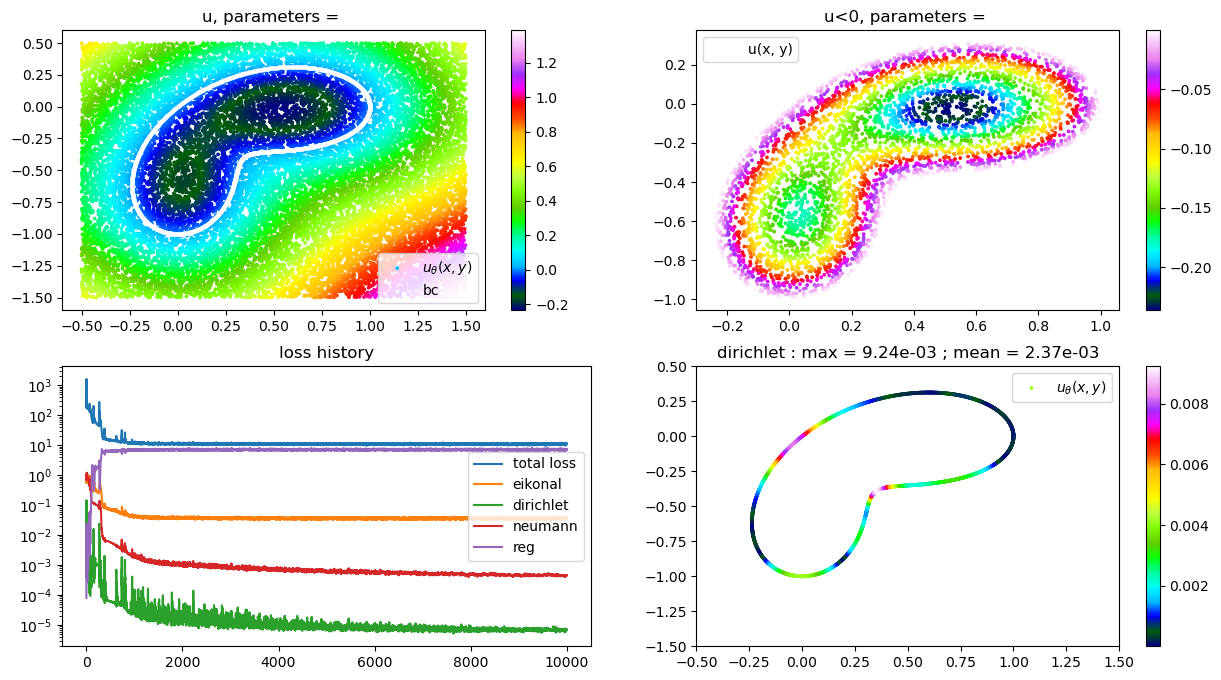

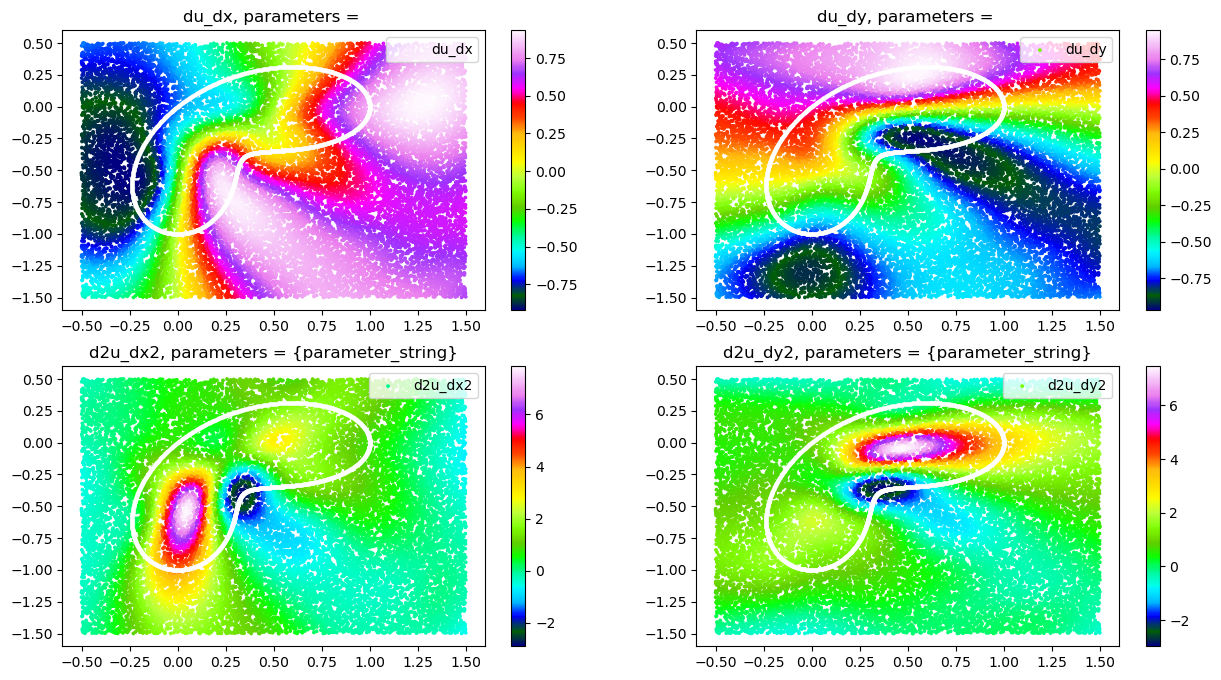

In [4]:
config = 1
casefile = "../../testcases/"+"lap_bean_1.json"
casefile_dict = read_config(casefile)

cas = Case(casefile)
problem_considered = cas.problem
pde_considered = cas.pde
form_considered = cas.form
type = 0 # help="0 - all ; 1 - add ; 2 - add IPP ; 3 - mult"

dir_name = "../../"+cas.dir_name
models_dir = dir_name+"models/"
corr_type = cas.corr_type
corr_dir = "../../"+cas.corr_dir_name
create_tree(corr_dir)

## Récupération du modèle

### Config file :  ../../networks/Poisson2D/Bean/SDEikonalLap/ConstantForce/form_1/0.0/models/config_1.json
### Model file :  ../../networks/Poisson2D/Bean/SDEikonalLap/ConstantForce/form_1/0.0/models/model_1.pth
### Config  1  :  {'layers': [64, 64, 64, 64, 64, 64], 'activation': 'sine', 'lr': 0.007, 'decay': 0.99, 'w_data': 0.0, 'w_res': 1.0, 'n_epochs': 10000, 'n_collocations': 2000, 'n_data': 0}
Threshold of the sampling:  0.0
Threshold of the sampling:  0.0
Threshold of the sampling:  0.0
Threshold of the sampling:  0.0
>> load network /home/flecourtier/Bureau/Thèse/networks/Poisson2D/Bean/SDEikonalLap/ConstantForce/form_1/0.0/models/model_1.pth
jsbdbshd
network loaded


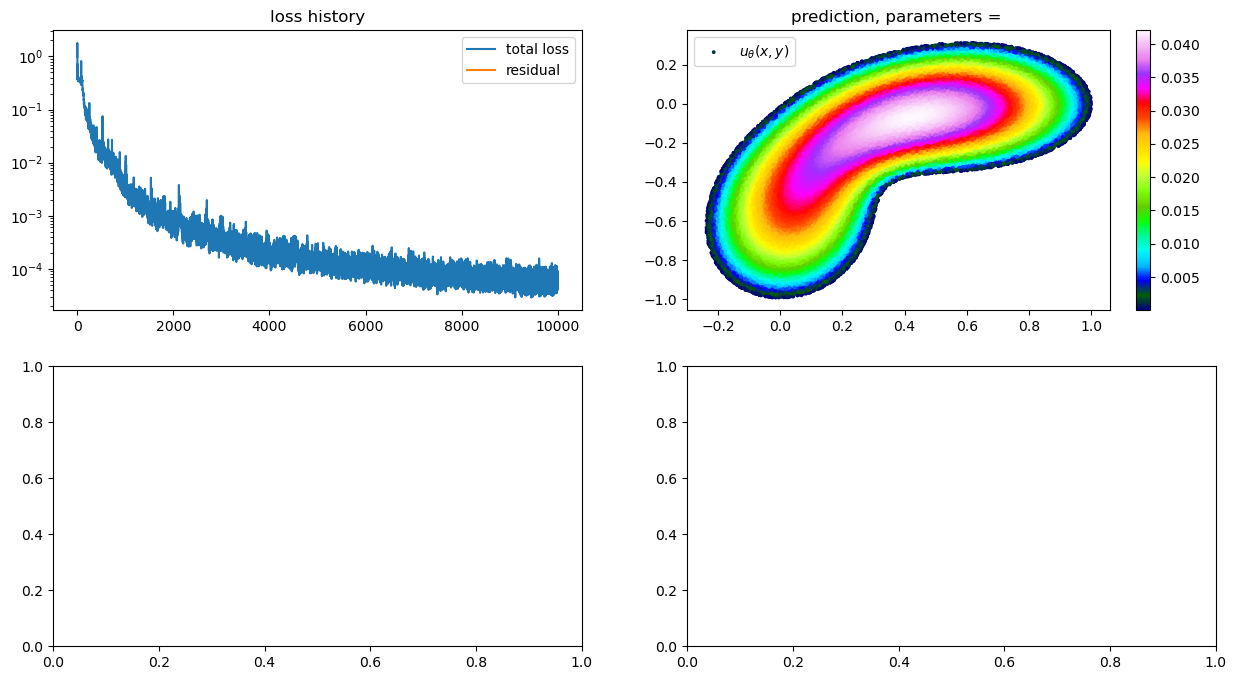

In [5]:
config_filename = models_dir+"config_"+str(config)+".json"
model_filename = models_dir+"model_"+str(config)+".pth"
print("### Config file : ",config_filename)
print("### Model file : ",model_filename)

dict = read_config(config_filename)
print("### Config ", config, " : ", dict)

trainer = run_Poisson2D(cas,config,dict)

In [6]:
eik = cas.sd_function.eik_pinns
form_trainer = cas.sd_function.form_trainer

In [7]:
mesh_dir = str(current / "networks" / "EikonalLap2D" / form_considered.__class__.__name__ / "meshes")+"/"
if os.path.exists(mesh_dir):
    shutil.rmtree(mesh_dir)

## Correction

In [8]:
if trainer.pde.nb_parameters == 0:
    params = [[None,None,None]]
else:
    mu = torch.mean(trainer.pde.parameter_domain, axis=1)
    S,f,p = mu.numpy()
    params = [[S,f,p]]

nb_vert = 32
deg_corr = 10

In [9]:
mesh_test = UnitSquareMesh(nb_vert,nb_vert)
mesh_test.hmin()

0.04419417382415922

### Avec FEM

In [10]:
solver = FEMSolver(nb_cell=nb_vert-1, params=params, cas=cas)

# get differents solutions
analytical = problem_considered.analytical_sol
if analytical:
    u_ex = UexExpr(params[0], degree=10, domain=solver.mesh, pb_considered=solver.pb_considered)
    
else:
    mesh_ex,V_ex,u_ex = problem_considered.u_ref(form_trainer,mesh_dir)

hmin =  0.018247916933846434
hmax =  0.09123958466923217
mmg2d_O3 -nr -hmin 0.018247916933846434 -hmax 0.09123958466923217 -hausd 0.0018247916933846434 -ls -sol /tmp/tmprayn5l7f/Th.solb /tmp/tmprayn5l7f/Th.meshb
  -- MMG2D, Release 5.7.0 (Dec. 13, 2022) 
     Copyright (c) Bdx INP/CNRS/Inria/UPMC, 2004-
     Mar 12 2024 16:58:31

  -- INPUT DATA
  %% /tmp/tmprayn5l7f/Th.meshb OPENED
  %% /tmp/tmprayn5l7f/Th.solb OPENED
  -- DATA READING COMPLETED.     0.004s

  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
   MODULE MMG2D: 5.7.0 (Dec. 13, 2022)
  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
     git branch: master
     git commit: b8995360a4c5b894949c08b1bba90750a2062a7a
     git date:   2024-01-30 11:43:38 +0100


  -- MMG2DLS: INPUT DATA
  --  INPUT DATA COMPLETED.     0.000s

  -- PHASE 1 : ISOSURFACE DISCRETIZATION

  -- MESH QUALITY   20000
     BEST   0.866025  AVRG.   0.866025  WRST.   0.866025 (7)
     HISTOGRAMM:  100.00 % > 0.12
  *** Manifold i

discarding line.
discarding line.


     Copyright (c) Bdx INP/CNRS/Inria/UPMC, 2004-
     Mar 12 2024 16:58:31

  -- INPUT DATA
  %% /tmp/tmp_akp1ycm/Th.meshb OPENED
  %% /tmp/tmp_akp1ycm/Th.solb OPENED
  -- DATA READING COMPLETED.     0.006s

  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
   MODULE MMG2D: 5.7.0 (Dec. 13, 2022)
  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
     git branch: master
     git commit: b8995360a4c5b894949c08b1bba90750a2062a7a
     git date:   2024-01-30 11:43:38 +0100


  -- MMG2DLS: INPUT DATA
  --  INPUT DATA COMPLETED.     0.000s

  -- PHASE 1 : ISOSURFACE DISCRETIZATION

  -- MESH QUALITY   20000
     BEST   0.866025  AVRG.   0.866025  WRST.   0.866025 (7)
     HISTOGRAMM:  100.00 % > 0.12
  *** Manifold implicit surface.
  -- PHASE 1 COMPLETED.     0.005s

  -- PHASE 2 : ANALYSIS
  -- PHASE 2 COMPLETED.     0.001s

  -- PHASE 3 : MESH IMPROVEMENT
            4 splitted,      172 collapsed,      289 swapped, 3 iter.

  -- GRADATION : 1.300000 (2.300000)
  

discarding line.


       100940 splitted,      329 collapsed,    10674 swapped, 5 iter.

  -- GRADATION : 1.300000 (2.300000)
           19 splitted,      222 collapsed,      128 swapped, 3 iter.
        12318 splitted,   118017 collapsed,    13574 swapped,   221417 moved, 5 iter. 
  -- PHASE 3 COMPLETED.     0.710s

  -- MESH QUALITY   89314
     BEST   1.000000  AVRG.   0.955307  WRST.   0.648151 (3306)
     HISTOGRAMM:  100.00 % > 0.12

  -- MESH PACKED UP
     NUMBER OF VERTICES          45057   CORNERS        4
     NUMBER OF TRIANGLES         89314
     NUMBER OF EDGES              1229

   MMG2DLS: ELAPSED TIME  0.723s

  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
   END OF MODULE MMG2D
  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&


  -- WRITING DATA FILE /tmp/tmp14nk6sqb/Th.o.meshb
  %% /tmp/tmp14nk6sqb/Th.o.meshb OPENED
  %% /tmp/tmp14nk6sqb/Th.o.sol OPENED
  -- WRITING COMPLETED

   ELAPSED TIME  0.745s

Finished in (0.76s)
Truncating mesh from region 3
CONV

discarding line.


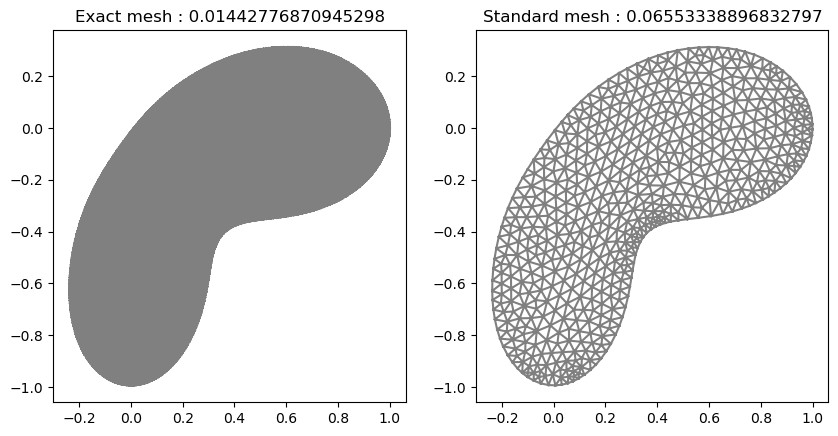

In [31]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plot(mesh_ex)
plt.title("Exact mesh : "+str(mesh_ex.hmax()))

plt.subplot(1,2,2)
plot(solver.mesh)
plt.title("Standard mesh : "+str(solver.mesh.hmax()))
plt.show()

In [24]:
if analytical:
    u_PINNs, norm_L2_PINNs = get_u_PINNs(trainer,solver,deg_corr,get_error=True,analytical_sol=analytical)
    u_Corr,C,norm_L2_Corr = correct_pred(solver,u_PINNs,corr_type,analytical_sol=analytical)
    u_FEM,norm_L2_FEM = solver.fem(0,analytical_sol=analytical)
else:
    print("Get u_PINNs_Vex")
    
    XXYY = V_ex.tabulate_dof_coordinates()
    X_test = torch.tensor(XXYY,requires_grad=True)
    X_test = SpaceTensor(X_test,torch.zeros_like(X_test,dtype=int))

    # get parameters
    nb_params = len(trainer.pde.parameter_domain)
    shape = (XXYY.shape[0],nb_params)
    if shape[1] == 0:
        mu_test = torch.zeros(shape)
    else:
        ones = torch.ones(shape)
        mu_test = (torch.mean(trainer.pde.parameter_domain, axis=1) * ones).to(device)

    pred = trainer.network.setup_w_dict(X_test, mu_test)
    phi_tild = pred["w"][:,0].cpu().detach().numpy()
    u_PINNs_Vex = Function(V_ex)
    u_PINNs_Vex.vector()[:] = phi_tild.copy()
    
    print("Get u_PINNs")

    u_PINNs, _ = get_u_PINNs(trainer,solver,deg_corr,get_error=False,analytical_sol=analytical)
    # u_PINNs_inter = interpolate(u_PINNs, V_ex)
    norm_L2_PINNs = (assemble((((u_ex - u_PINNs_Vex)) ** 2) * solver.dx) ** (0.5)) / (assemble((((u_ex)) ** 2) * solver.dx) ** (0.5))
    
    print("Get u_Corr")

    u_Corr,C,_ = correct_pred(solver,u_PINNs,corr_type,get_error=False,analytical_sol=analytical)
    # u_Corr_inter = project(u_Corr, solver.V)
    # u_Corr_inter = interpolate(u_Corr_inter, V_ex)
    u_Corr_inter = u_PINNs_Vex + interpolate(C, V_ex)
    norm_L2_Corr = (assemble((((u_ex - u_Corr_inter)) ** 2) * solver.dx) ** (0.5)) / (assemble((((u_ex)) ** 2) * solver.dx) ** (0.5))

    print("Get u_FEM")

    u_FEM,_ = solver.fem(0,get_error=False,analytical_sol=analytical)
    u_FEM_inter = interpolate(u_FEM, V_ex)
    norm_L2_FEM = (assemble((((u_ex - u_FEM_inter)) ** 2) * solver.dx) ** (0.5)) / (assemble((((u_ex)) ** 2) * solver.dx) ** (0.5))

Get u_PINNs_Vex
Get u_PINNs
Get u_Corr
Get u_FEM


In [21]:
norm_L2_PINNs

0.0008541720671889841

Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Object cannot be plotted directly, projecting to piecewise linears.


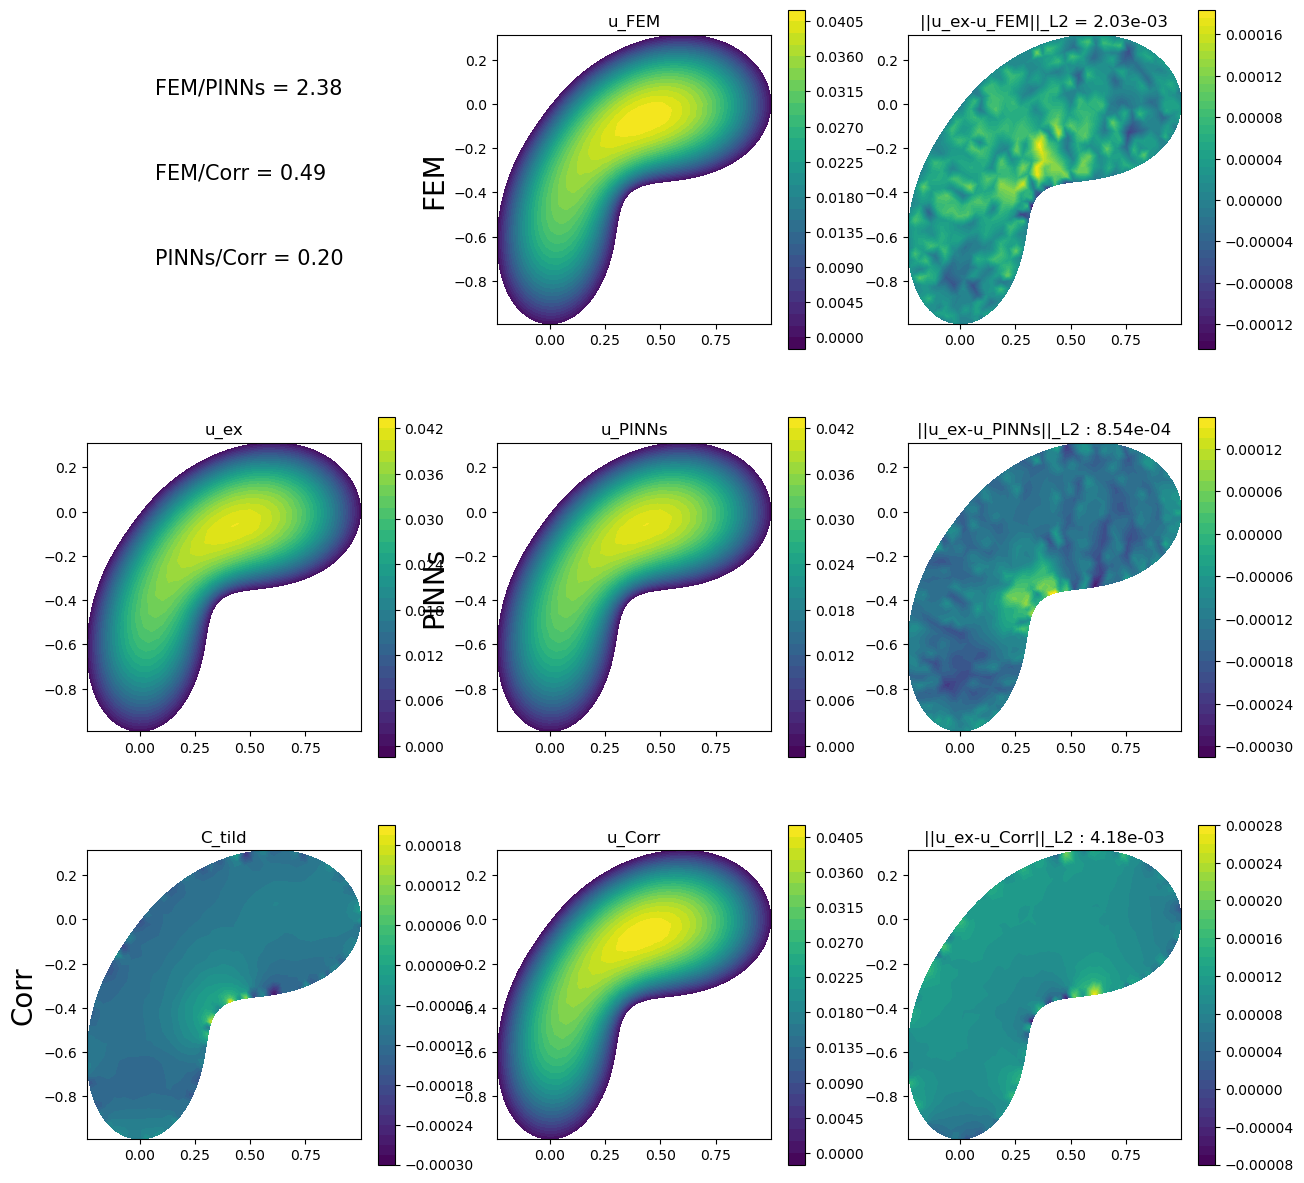

In [22]:
u_ex = interpolate(u_ex, solver.V)

solutions = [u_PINNs,u_Corr_inter,u_FEM_inter]
normes = [norm_L2_PINNs,norm_L2_Corr,norm_L2_FEM]

plot_sol(corr_dir,config,"FEM",u_ex,C,solutions,normes,solver.V)

### Avec PhiFEM

In [ ]:
solver = PhiFemSolver(nb_cell=nb_vert-1, params=params, cas=cas)

# get differents solutions
analytical = problem_considered.analytical_sol
if analytical:
    u_ex = UexExpr(params[0], degree=10, domain=solver.mesh, pb_considered=solver.pb_considered)
    u_PINNs, norm_L2_PINNs = get_u_PINNs(trainer,solver,deg_corr,get_error=True,analytical_sol=analytical)
    u_Corr,C,norm_L2_Corr = correct_pred(solver,u_PINNs,corr_type,analytical_sol=analytical)
    u_FEM,norm_L2_FEM = solver.fem(0,analytical_sol=analytical)
else:
    mesh_dir = dir_name + "meshes/"
    mesh_ex,V_ex,u_ex = problem_considered.u_ref(form_trainer,mesh_dir)

    # print("Get u_PINNs")

    u_PINNs, _ = get_u_PINNs(trainer,solver,deg_corr,get_error=False,analytical_sol=analytical)
    # u_PINNs_inter = interpolate(u_PINNs_inter, V_ex)
    norm_L2_PINNs = (assemble((((u_ex - u_PINNs)) ** 2) * solver.dx) ** (0.5)) / (assemble((((u_ex)) ** 2) * solver.dx) ** (0.5))
    
    print("Get u_Corr")

    u_Corr,C,_ = correct_pred(solver,u_PINNs,corr_type,get_error=False,analytical_sol=analytical)
    u_Corr_inter = project(u_Corr, solver.V)
    u_Corr_inter = interpolate(u_Corr_inter, V_ex)
    norm_L2_Corr = (assemble((((u_ex - u_Corr_inter)) ** 2) * solver.dx) ** (0.5)) / (assemble((((u_ex)) ** 2) * solver.dx) ** (0.5))

    print("Get u_FEM")

    u_FEM,_ = solver.fem(0,get_error=False,analytical_sol=analytical)
    u_FEM_inter = interpolate(u_FEM, V_ex)
    norm_L2_FEM = (assemble((((u_ex - u_FEM_inter)) ** 2) * solver.dx) ** (0.5)) / (assemble((((u_ex)) ** 2) * solver.dx) ** (0.5))

# # get differents solutions
# analytical = problem_considered.analytical_sol
# if analytical:
#     u_ex = UexExpr(params[0], degree=10, domain=solver.mesh, pb_considered=solver.pb_considered)
# else:
#     u_ex = problem_considered.u_ref()
# u_PINNs, norm_L2_PINNs = get_u_PINNs(trainer,solver,deg_corr, get_error=True,analytical_sol=analytical)
# print("u_PINNs : ",norm_L2_PINNs)
# u_Corr,C,norm_L2_Corr = correct_pred(solver,u_PINNs,corr_type,analytical_sol=analytical)
# print("u_Corr : ",norm_L2_Corr)
# u_FEM,norm_L2_FEM = solver.fem(0,analytical_sol=analytical)
# print("u_FEM : ",norm_L2_FEM)

num of cell in the ghost penalty: 124
Reading new mesh from file


/home/flecourtier/Bureau/Thèse/src/scar/geometry/Geometry2D.py:154: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400441250/work/torch/csrc/utils/tensor_new.cpp:261.)
  return self.R()@torch.Tensor([x,y])


Building point search tree to accelerate distance queries.
Get u_Corr
Computed bounding box tree with 40903 nodes for 20452 points.


TypeError: corr_add() got an unexpected keyword argument 'get_error'

Building point search tree to accelerate distance queries.
Computed bounding box tree with 14569 nodes for 7285 points.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


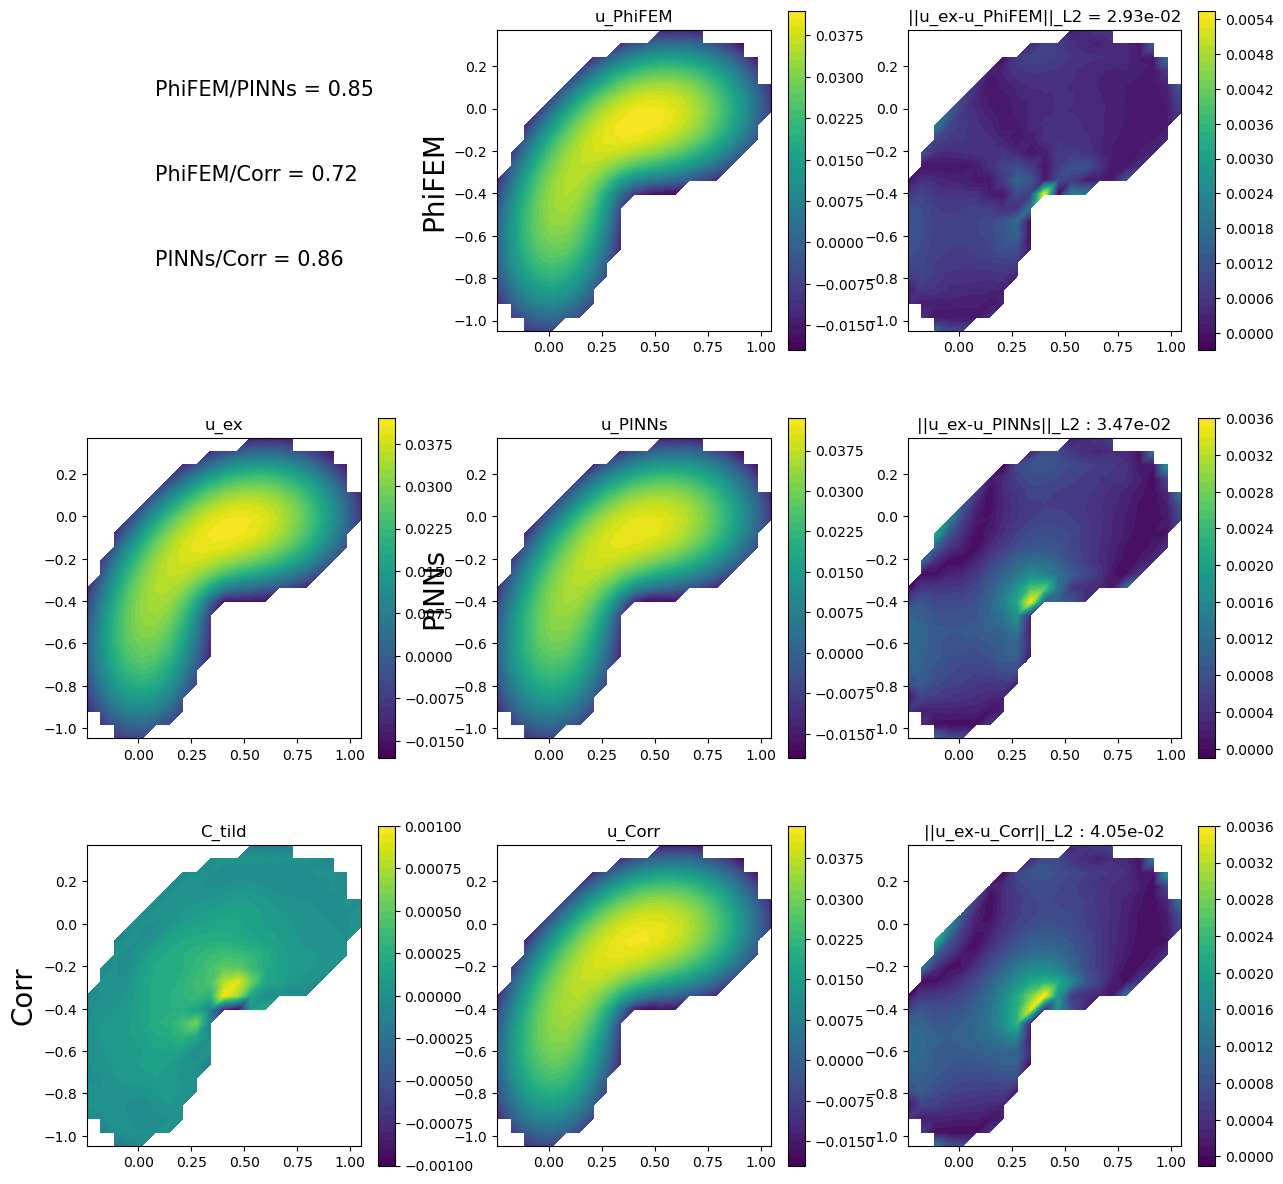

In [ ]:
# plot
u_ex = project(u_ex, solver.V)

solutions = [u_PINNs,u_Corr,u_FEM]
normes = [norm_L2_PINNs,norm_L2_Corr,norm_L2_FEM]

plot_sol(corr_dir,config,"PhiFEM",u_ex,C,solutions,normes,solver.V)

Projection sur $\Omega$ :

Building point search tree to accelerate distance queries.
Computed bounding box tree with 973 nodes for 487 points.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


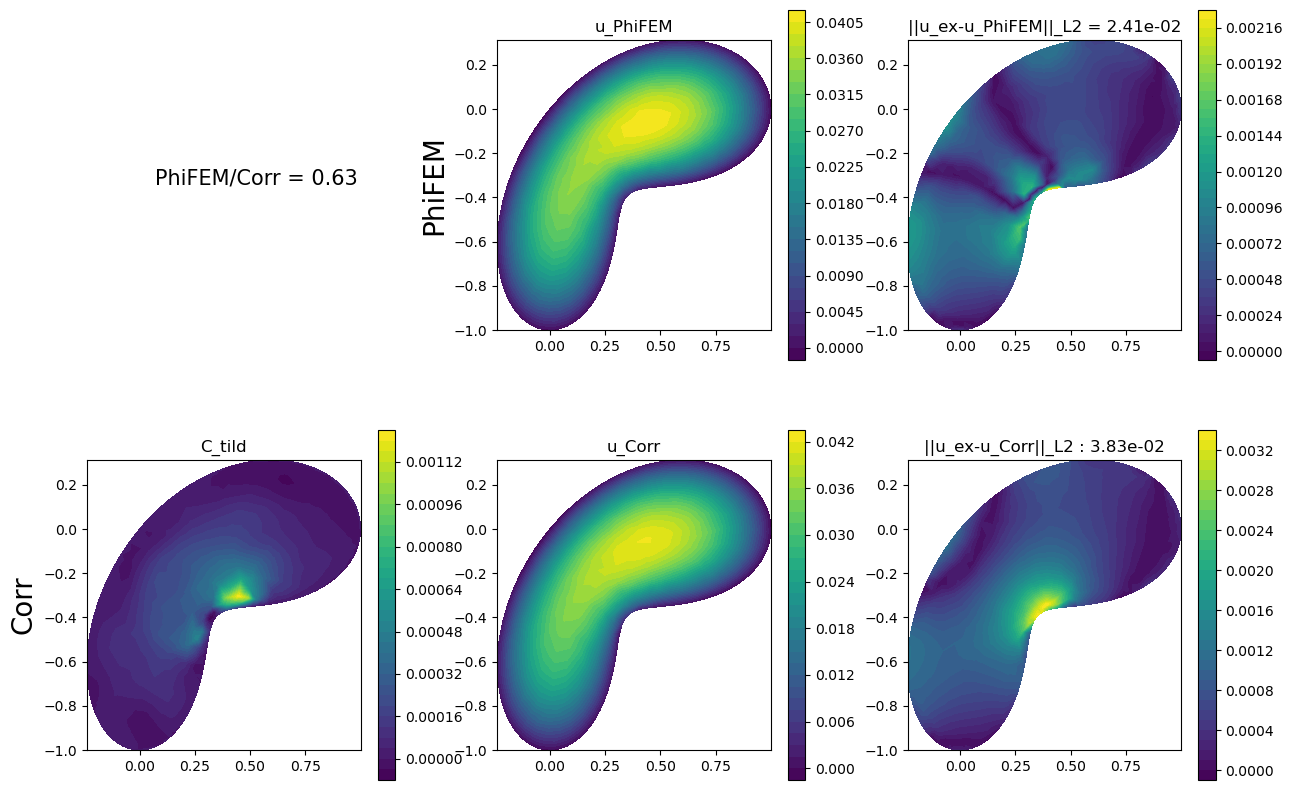

In [ ]:
# project u_ex on Omega
u_ex_Omega = project(u_ex, solver.V_ex)

# project u_Corr on Omega
u_Corr_ = project(u_Corr, solver.V)
u_Corr_Omega = project(u_Corr_, solver.V_ex)    
norm_L2_Corr_Omega = (assemble((((u_ex_Omega - u_Corr_Omega)) ** 2) * solver.dx_ex) ** (0.5)) / (assemble((((u_ex_Omega)) ** 2) * solver.dx_ex) ** (0.5))

# project u_FEM on Omega
u_FEM_ = project(u_FEM, solver.V)
u_FEM_Omega = project(u_FEM_, solver.V_ex)

norm_L2_FEM_Omega = (assemble((((u_ex_Omega - u_FEM_Omega)) ** 2) * solver.dx_ex) ** (0.5)) / (assemble((((u_ex_Omega)) ** 2) * solver.dx_ex) ** (0.5))


#####
# Plot !
#####

solutions = [u_Corr_Omega,u_FEM_Omega]
normes = [norm_L2_Corr_Omega,norm_L2_FEM_Omega]
# plot_sol(corr_type,"PhiFEM",u_ex_Omega,solutions,normes,solver.V_ex,project_on_Omega=True)
plot_sol(corr_dir,config,"PhiFEM",u_ex_Omega,C,solutions,normes,solver.V_ex,project_on_Omega=True)